**OlabisiDS Notebook**

Exploration Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [2]:
df_ch = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df_ch.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_ch.shape
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Columns Interpretations

1. **customerID**: Unique identifier for each customer.
2. **gender**: Gender of the customer (Male/Female).
3. **SeniorCitizen**: Indicates if the customer is a senior citizen (1) or not (0).
4. **Partner**: Indicates if the customer has a partner (Yes/No).
5. **Dependents**: Indicates if the customer has dependents (Yes/No).
6. **tenure**: Number of months the customer has stayed with the company.
7. **PhoneService**: Indicates if the customer has a phone service (Yes/No).
8. **MultipleLines**: Indicates if the customer has multiple lines (Yes/No/No phone service).
9. **InternetService**: Customer's internet service provider (DSL, Fiber optic, No).
10. **OnlineSecurity**: Indicates if the customer has online security (Yes/No/No internet service).
11. **OnlineBackup**: Indicates if the customer has online backup (Yes/No/No internet service).
12. **DeviceProtection**: Indicates if the customer has device protection (Yes/No/No internet service).
13. **TechSupport**: Indicates if the customer has tech support (Yes/No/No internet service).
14. **StreamingTV**: Indicates if the customer has streaming TV service (Yes/No/No internet service).
15. **StreamingMovies**: Indicates if the customer has streaming movies service (Yes/No/No internet service).
16. **Contract**: The contract term of the customer (Month-to-month, One year, Two year).
17. **PaperlessBilling**: Indicates if the customer has paperless billing (Yes/No).
18. **PaymentMethod**: The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
19. **MonthlyCharges**: The amount charged to the customer monthly.
20. **TotalCharges**: The total amount charged to the customer.
21. **Churn**: Indicates if the customer churned (Yes/No).

In [4]:
df_ch.duplicated().sum()

0

In [5]:
def column_summary(data):
  col = []
  dtype = []
  unique = []
  nunique = []
  duplicated = []
  null = []

  for column in data.columns:
    col.append(column)
    dtype.append(data[column].dtype)
    unique.append(data[column].unique())
    nunique.append(data[column].nunique())
    duplicated.append(data[column].duplicated().sum())
    null.append(data[column].isnull().sum())

  return pd.DataFrame({"Column": col, "Dtype": dtype, "Unique": unique,
                       "Nunique": nunique, "Duplicated Values": duplicated, "Null Values": null})

In [6]:
column_summary(df_ch)

,Column,Dtype,Unique,Nunique,Duplicated Values,Null Values
0,customerID,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043,0,0
1,gender,object,"[Female, Male]",2,7041,0
2,SeniorCitizen,int64,"[0, 1]",2,7041,0
3,Partner,object,"[Yes, No]",2,7041,0
4,Dependents,object,"[No, Yes]",2,7041,0
5,tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73,6970,0
6,PhoneService,object,"[No, Yes]",2,7041,0
7,MultipleLines,object,"[No phone service, No, Yes]",3,7040,0
8,InternetService,object,"[DSL, Fiber optic, No]",3,7040,0
9,OnlineSecurity,object,"[No, Yes, No internet service]",3,7040,0


In [7]:
#Dropping customerID column as it wont be needed
df_ch.drop(columns="customerID", axis=1, inplace=True)

In [8]:
#Sub_setting numerical columns
num_col = []
for column in df_ch.columns:
  if df_ch[column].dtype in ["int64", "float64"]:
    num_col.append(column)

#Column summary of num cols
column_summary(df_ch[num_col])

,Column,Dtype,Unique,Nunique,Duplicated Values,Null Values
0,SeniorCitizen,int64,"[0, 1]",2,7041,0
1,tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73,6970,0
2,MonthlyCharges,float64,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,...",1585,5458,0


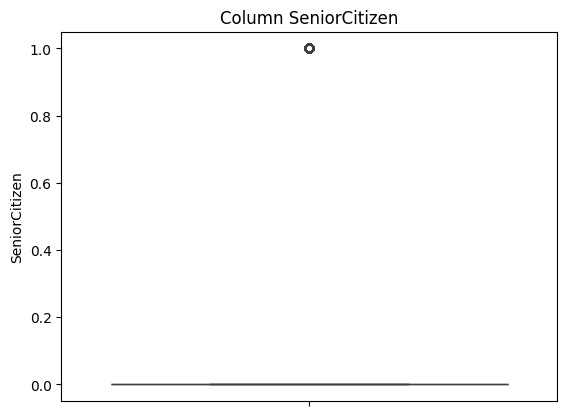

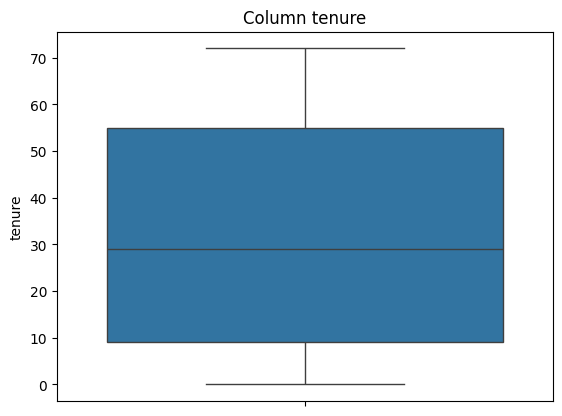

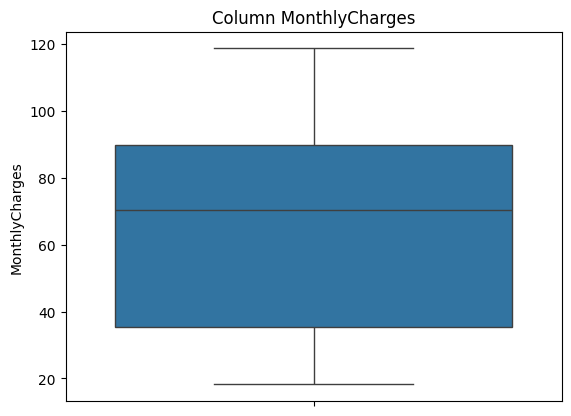

In [9]:
#Checking for outliers in numerical columns by visualization
def visualize_outliers(data):
  for i in num_col:
    sns.boxplot(data[i])
    plt.title(f"Column {i}")
    plt.show();

visualize_outliers(data=df_ch)

In [10]:
#Converting columns to numeric
df_ch["gender"] = df_ch["gender"].replace({"Female": 0, "Male": 1})
df_ch["Partner"] = df_ch["Partner"].replace({"No": 0, "Yes": 1})
df_ch["Dependents"] = df_ch["Dependents"].replace({"No": 0, "Yes": 1})
df_ch["PhoneService"] = df_ch["PhoneService"].replace({"No": 0, "Yes": 1})
df_ch["MultipleLines"] = df_ch["MultipleLines"].replace({"No": 0, "No phone service": 0, "Yes": 1})
df_ch["PaperlessBilling"] = df_ch["PaperlessBilling"].replace({"No": 0, "Yes": 1})
df_ch["Churn"] = df_ch["Churn"].replace({"No": 0, "Yes": 1})

cols_replace = ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
                     "TechSupport", "StreamingTV", "StreamingMovies"]
for col in cols_replace:
    df_ch[col] = df_ch[col].replace({"No": 0, "No internet service": 0, "Yes": 1})

#Convert columns to numeric data type
numeric_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
                "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
                "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]
df_ch[numeric_cols] = df_ch[numeric_cols].apply(pd.to_numeric)

In [11]:
#Checking columns that are still objects
object_col = [column for column in df_ch.columns if df_ch[column].dtype == "object"]
#Column summary of num cols
column_summary(df_ch[object_col])

,Column,Dtype,Unique,Nunique,Duplicated Values,Null Values
0,InternetService,object,"[DSL, Fiber optic, No]",3,7040,0
1,Contract,object,"[Month-to-month, One year, Two year]",3,7040,0
2,PaymentMethod,object,"[Electronic check, Mailed check, Bank transfer...",4,7039,0
3,TotalCharges,object,"[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5...",6531,512,0


In [12]:
df_ch.shape
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [13]:
# Extracting unique internet services so we can drop the InternetService column later
df_ch["dsl"] = (df_ch["InternetService"] == "DSL").astype(int)
df_ch["fiber"] = (df_ch["InternetService"] == "Fiber optic").astype(int)

# Converting the Contract column to numeric
contract_mapping = {"Month-to-month": 0, "One year": 1, "Two year": 2}
df_ch["Contract"] = df_ch["Contract"].map(contract_mapping)

# Extracting unique payment methods so we can drop the PaymentMethod column later
df_ch["Electronic_check"] = (df_ch["PaymentMethod"] == "Electronic check").astype(int)
df_ch["Mailed_check"] = (df_ch["PaymentMethod"] == "Mailed check").astype(int)
df_ch["Bank_transfer"] = (df_ch["PaymentMethod"] == "Bank transfer (automatic)").astype(int)
df_ch["Credit_card"] = (df_ch["PaymentMethod"] == "Credit card (automatic)").astype(int)

#Converting Totalcharges column
df_ch['TotalCharges'] = pd.to_numeric(df_ch['TotalCharges'], errors='coerce')

In [14]:
# Dropping the InternetService and PaymentMethod columns
df_ch.drop(columns=["InternetService", "PaymentMethod"], axis=1, inplace=True)

Since all columns are now in numeric, lets check for column_summary to understand the newly converted columns

In [15]:
column_summary(df_ch)

,Column,Dtype,Unique,Nunique,Duplicated Values,Null Values
0,gender,int64,"[0, 1]",2,7041,0
1,SeniorCitizen,int64,"[0, 1]",2,7041,0
2,Partner,int64,"[1, 0]",2,7041,0
3,Dependents,int64,"[0, 1]",2,7041,0
4,tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73,6970,0
5,PhoneService,int64,"[0, 1]",2,7041,0
6,MultipleLines,int64,"[0, 1]",2,7041,0
7,OnlineSecurity,int64,"[0, 1]",2,7041,0
8,OnlineBackup,int64,"[1, 0]",2,7041,0
9,DeviceProtection,int64,"[0, 1]",2,7041,0


We can see there are 11 null values in Totalcharges column. Since they are very low, we will be dropping them instead.

In [16]:
#Dropping rows with null values in TotalCharges
df_ch.dropna(subset=["TotalCharges"], inplace=True)

In [17]:
df_ch.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,dsl,fiber,Electronic_check,Mailed_check,Bank_transfer,Credit_card
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,0,1,0,1,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,0,1,0,0,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,1,0,0,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,0,1,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,1,0,1,1,0,0,0


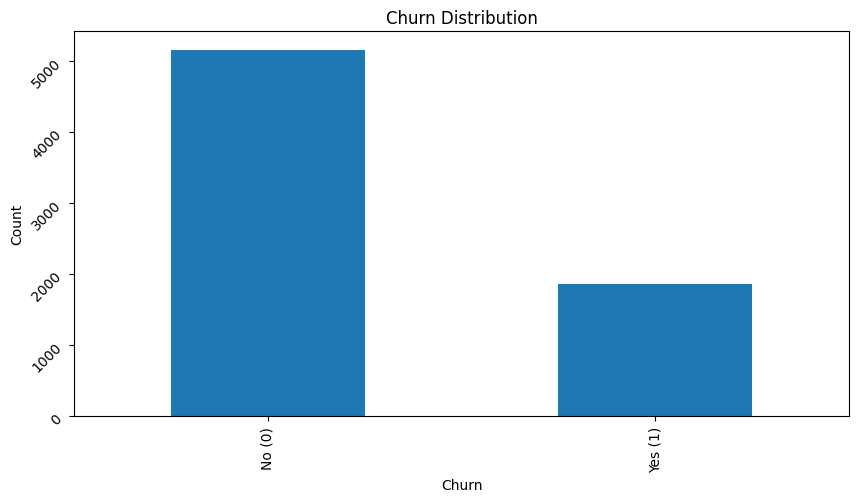

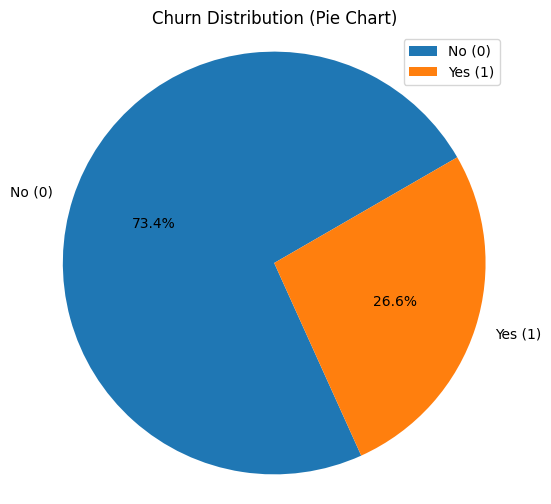

In [18]:
# Creating a mapping for better visualization
churn_labels = df_ch["Churn"].map({0: "No (0)", 1: "Yes (1)"})

#Checking for the balance of the target by visualization
plt.figure(figsize=(10, 5))
churn_labels.value_counts().plot(kind="bar")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Churn Distribution")
plt.yticks(rotation=45)
plt.show()

#Pie chart visualization
plt.figure(figsize=(6, 6))
plt.pie(churn_labels.value_counts(),
        labels=churn_labels.value_counts().index,
        autopct="%1.1f%%",
        startangle=30)
plt.axis("equal")
plt.legend(churn_labels.value_counts().index, loc="best")
plt.title("Churn Distribution (Pie Chart)")
plt.show();

There is imbalance in our target variable therefore we will have to oversample it later on.

Lets drop Tenure and Contract columns as Tenure indicate loyalty and it will affect Churn prediction. Also, Contract indicate how long a customer has been sticking around for which can also highly influence Churn prediction

In [19]:
#Dropping the InternetService and PaymentMethod columns
df_ch.drop(columns=["tenure", "Contract"], axis=1, inplace=True)

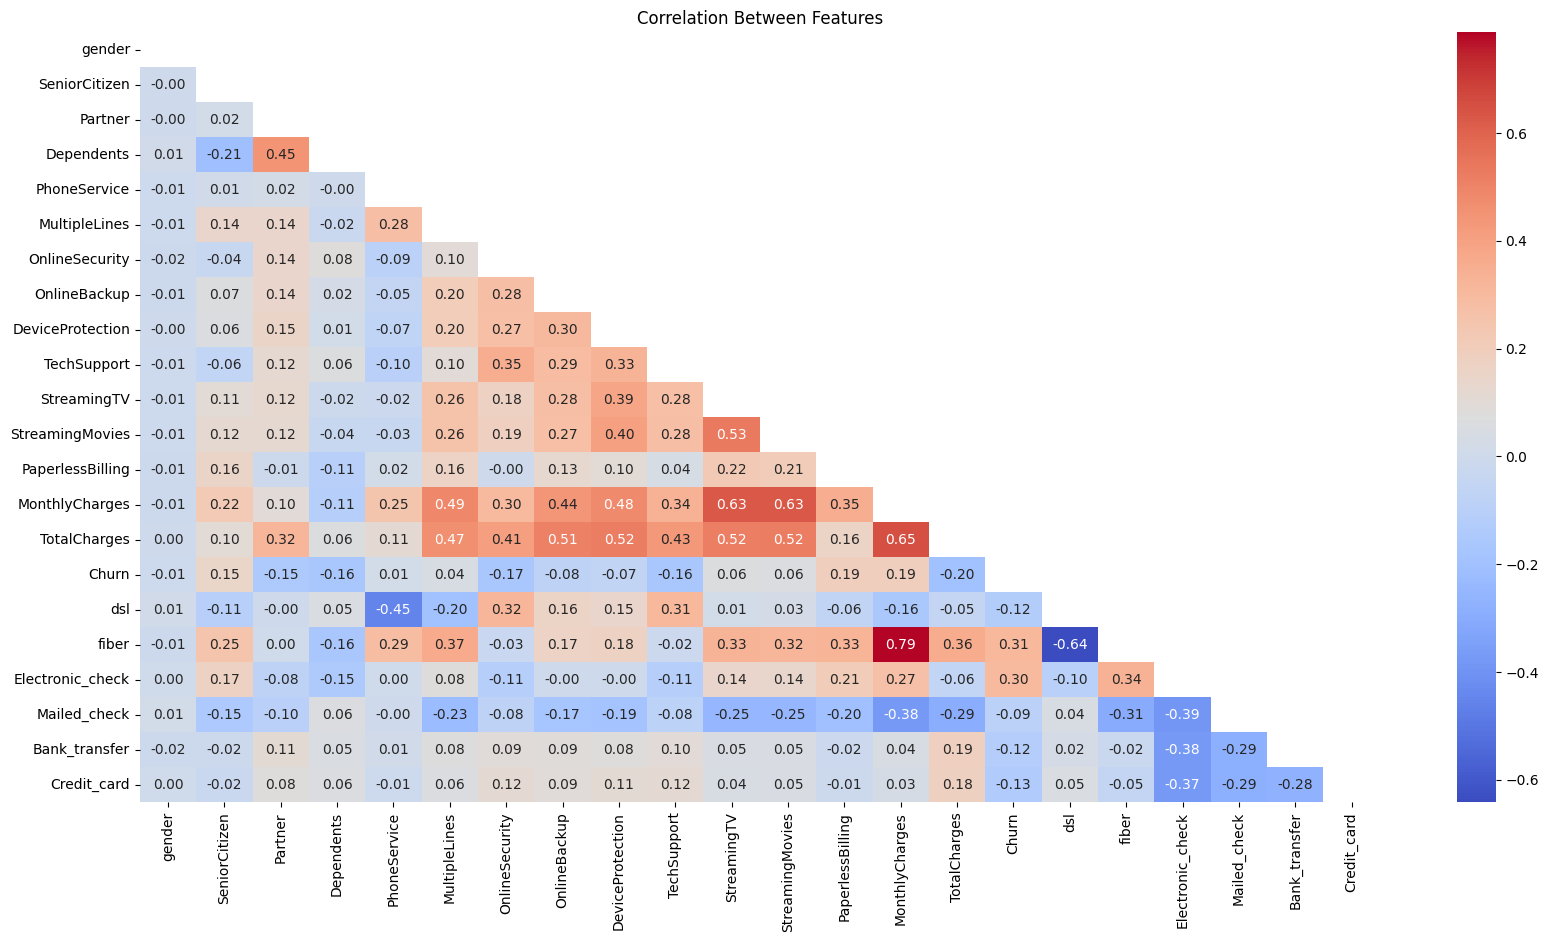

In [20]:
#Checking for correlation among features
corr = df_ch.corr()
mask = np.triu(corr)
plt.figure(figsize=(20,10))
sns.heatmap(corr,
            mask=mask,
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title("Correlation Between Features")
plt.show();

Fiber and MonthlyCharges has a correlation of 0.79 which relatively high. We will have to drop 1 but considering MonthlyCharges is a key feature to our project, we will be dropping fiber instead

In [21]:
#Dropping the fiber
df_ch.drop(columns="fiber", axis=1, inplace=True)

**Modelling**

Modelling Environment Setup

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [23]:
X = df_ch.drop(columns="Churn", axis=1)
y = df_ch["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train_Shape", X_train.shape)
print("X_test_shape", X_test.shape)
print("y_train_shape", y_train.shape)
print("y_test_shape", y_test.shape)

X_train_Shape (5625, 20)
X_test_shape (1407, 20)
y_train_shape (5625,)
y_test_shape (1407,)


In [24]:
#oversampling of training set because of data imbalance in target vector
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Performing feature selection to reduce total number of features before proceeding

In [25]:
#Performing features selection
#k = 12
#selector = SelectKBest(score_func=f_classif, k=k)
#X_train = selector.fit_transform(X_train, y_train)
#X_test = selector.transform(X_test)

#Get the column names of the selected features
#selected_features = selector.get_support(indices=True)
#selected_feature_names = X.columns[selected_features]

#print("Selected features:", selected_feature_names)

Scaling features

In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#Scaling the test set
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Parameters Tuning

In [28]:
# Hyperparameter tuning with Hyperopt
def objective(space):
    clf = XGBClassifier(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=space['reg_alpha'],
        min_child_weight=space['min_child_weight'],
        colsample_bytree=space['colsample_bytree'],
        use_label_encoder=False,
        eval_metric="logloss"
    )

    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 5),
    'max_depth': hp.quniform('max_depth', 1, 100, 1),
    'gamma': hp.uniform('gamma', 0, 1.0),
    'reg_alpha': hp.quniform('reg_alpha', 0, 50, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 100, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best parameters:", best)

100%|██████████| 50/50 [00:46<00:00,  1.07trial/s, best loss: -0.7626154939587776]
Best parameters: {'colsample_bytree': 0.9940303041887877, 'gamma': 0.21410905653235884, 'max_depth': 58.0, 'min_child_weight': 78.0, 'n_estimators': 200.0, 'reg_alpha': 47.0}


In [29]:
# Using the best parameters to train the final model
best_params = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'gamma': best['gamma'],
    'reg_alpha': best['reg_alpha'],
    'min_child_weight': best['min_child_weight'],
    'colsample_bytree': best['colsample_bytree'],
    'use_label_encoder': False,
    'eval_metric': "logloss"
}

final_model = XGBClassifier(**best_params)
final_model.fit(X_train, y_train)

# Predictions and evaluation
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training set accuracy: {train_accuracy:.2f}")
print(f"Test set accuracy: {test_accuracy:.2f}")

Training set accuracy: 0.84
Test set accuracy: 0.76


In [30]:
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

Cross-validation accuracy scores for each fold: [0.70399516 0.76271186 0.88135593 0.87953995 0.87469734]
Mean cross-validation accuracy: 0.8204600484261502


In [31]:
classification_report = classification_report(y_test, y_test_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1033
           1       0.60      0.33      0.43       374

    accuracy                           0.76      1407
   macro avg       0.69      0.63      0.64      1407
weighted avg       0.74      0.76      0.74      1407



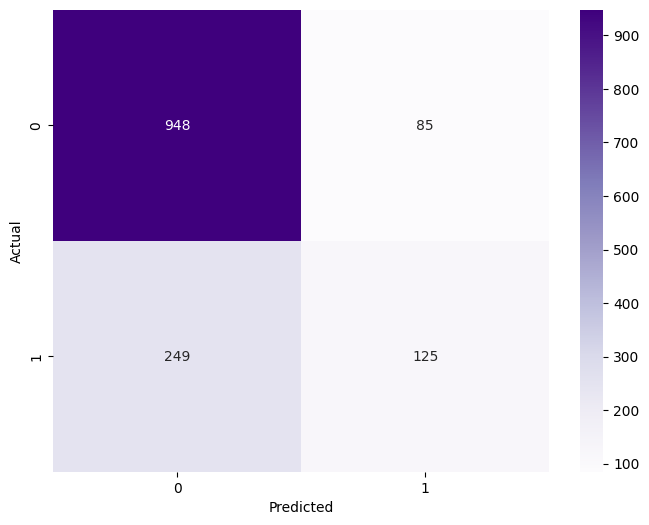

In [32]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True,
            fmt='', cmap="Purples")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();